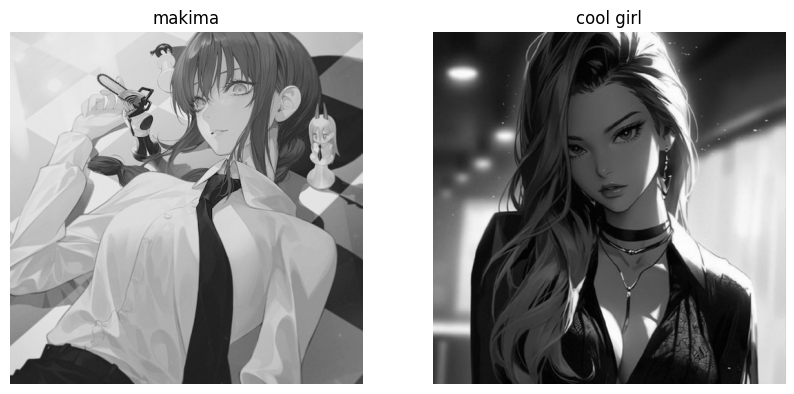

In [5]:
import utils as ut

imgs_folder = "imgs/"
img1_name = imgs_folder + "girl1.jpg"
img2_name = imgs_folder + "girl2.jpg"

default_size = (512, 512)

img1 = ut.load_image(img1_name, default_size)
img2 = ut.load_image(img2_name, default_size)

ut.show_images((img1, "makima"), (img2, "cool girl"))


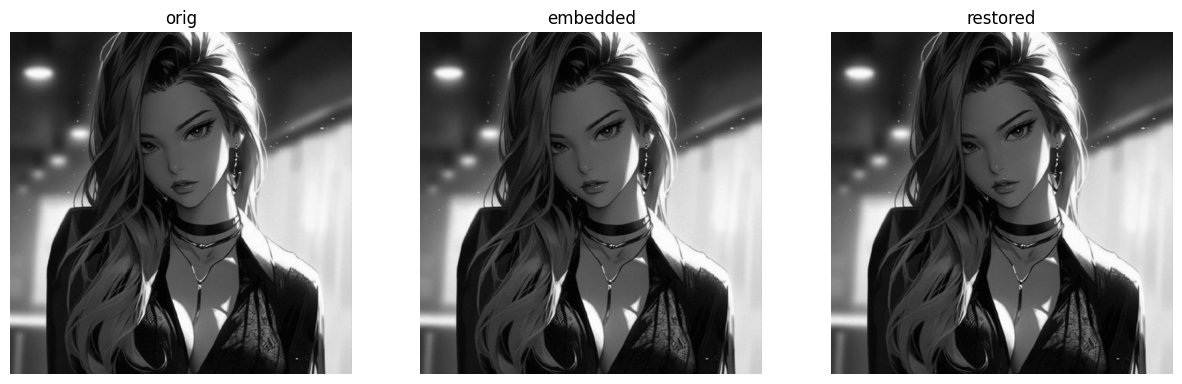

t               : 3.252852
block size      : 16
changed         : 972
PNSR            : 45.50
error function  : 0.4395790181110998

image size      : 512x512 = 262144
message len     : 1024 bits
total image cap : 1024 bits (blocks)
side info size  : 139968 bits (int8, float64)
bits overcap    : 136.69x

restored_img    : True
restored_mess   : True (1024/1024 = 100.00 %)
time embedding  : 0.112s
time extracting : 0.124s
time total      : 0.236s



In [1152]:
import utils as ut
import embedding as em
import importlib
importlib.reload(ut)
importlib.reload(em)

t = 3.252852
block_size = 16
debug = False
show = True
orig = ut.load_image("imgs/girl2.jpg")
# orig = ut.gen_test(64)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

process_params = em.ProcessParams()
process_params.debug = debug
process_params.show = show
process_params.use_new_bit_extraction = True

stats = em.process(orig, mess, t, block_size, process_params)
if not debug:
    print(stats)

In [ ]:
import utils as ut
import embedding as em
import importlib
importlib.reload(ut)
importlib.reload(em)

t = 1
block_size = 4
orig = ut.gen_test(128)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

process_params = em.ProcessParams()
process_params.debug = False
process_params.show = False
process_params.use_new_bit_extraction = False

stats1 = em.process(orig, mess, t, block_size, process_params)

process_params.use_new_bit_extraction = True

stats2 = em.process(orig, mess, t, block_size, process_params)

print(stats1)
print(stats2)

In [ ]:
import utils as ut
import embedding as em

t = 0.01
debug = False
show = False
orig = ut.load_image("imgs/girl2.jpg", (512, 512))

for i in range(2, 10):
    block_size = 2 ** i
    mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)
    stats = em.process(orig, mess, t, block_size, debug=debug, show=show)
    print(stats)

In [ ]:
import utils as ut
import embedding as em
import importlib
import numpy as np
importlib.reload(ut)
importlib.reload(em)

t = 0.1
block_size = 4
debug = False
show = True
orig = ut.gen_test(8)
ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

process_params = em.ProcessParams()
process_params.debug = True
process_params.show = True

stats = em.process(orig, mess, t, block_size, process_params)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

best: source(4) trail(10)  error(0.546918915663242) pred(0.646446)   x   t(3.252852)  b_size(16)



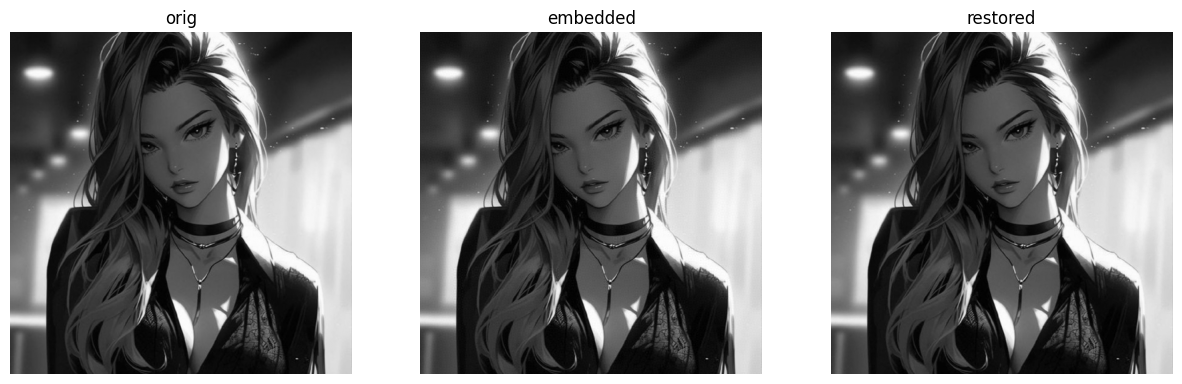

t               : 3.252852
block size      : 16
changed         : 978
PNSR            : 45.41
error function  : 0.5469189156632416

image size      : 512x512 = 262144
message len     : 1024 bits
total image cap : 1024 bits (blocks)
side info size  : 140832 bits (int8, float64)
bits overcap    : 137.53x

restored_img    : True
restored_mess   : False (915/1024 = 89.35546875%)
time embedding  : 0.112s
time extracting : 0.109s
time total      : 0.221s



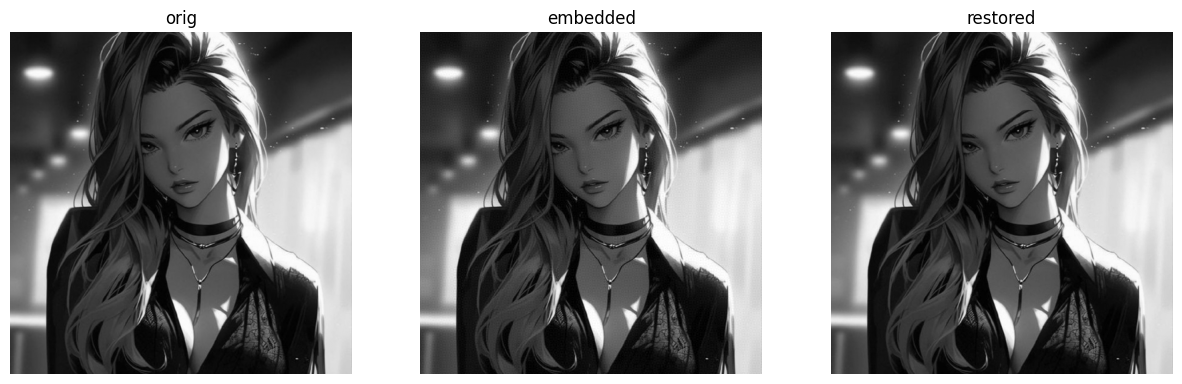

t               : 6.608068
block size      : 16
changed         : 1012
PNSR            : 40.34
error function  : 0.6851939560315774

image size      : 512x512 = 262144
message len     : 1024 bits
total image cap : 1024 bits (blocks)
side info size  : 145728 bits (int8, float64)
bits overcap    : 142.31x

restored_img    : True
restored_mess   : False (830/1024 = 81.0546875%)
time embedding  : 0.117s
time extracting : 0.112s
time total      : 0.230s

trail(0)   error(0.685193956031577) pred(0.000000)       t(6.608068)  b_size(16)


In [ ]:
import utils as ut
import embedding as em
import ABC
import importlib
importlib.reload(ut)
importlib.reload(em)
importlib.reload(ABC)

block_size = 16
# orig = ut.gen_test(8)
orig = ut.load_image("imgs/girl2.jpg")
# ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

space = ABC.AbcSpace()
space.block_size = (block_size, block_size)

process_params = em.ProcessParams()
process_params.debug = False
process_params.use_new_bit_extraction = False
process_params.use_new_error_function = False

params = ABC.AbcParams()
params.debug = False
params.show_images_at_end = True
params.show_food_sources = False
params.process_params = process_params

abc = ABC.Abc(orig, mess, space=space, params=params)

best_sol = abc.run()
random_stats = abc.run_random()
print(random_stats)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
food 1: 
   1.   source(1) trail(11)  error(0.456376151963341) pred(0.686636)   x   t(4.550814)  b_size(64)
   2.   source(1) trail(11)  error(0.464767380221983) pred(0.682702)   x   t(5.003061)  b_size(64)
   3.   source(1) trail(10)  error(0.506363063147254) pred(0.663851)   x   t(7.604708)  b_size(64)
   4.   source(1) trail(10)  error(0.478921082222681) pred(0.676169)   x   t(5.822961)  b_size(64)
   5.   source(1) trail(10)  error(0.401951528907130) pred(0.713291)   x   t(2.154779)  b_size(64)
   6.   source(1) trail(10)  error(0.506873711041925) pred(0.663626)   x   t(7.639803)  b_size(64)
   7.   source(1) trail(5)   error(0.499985180332044) pred(0.666673)       t(7.158815)  b_size(64)
food 2: 
   1.   source(2) trail(10)  error(0.535468938285053) pred(0.651267)   x   t(9.790775)  b_size(64)
   2.   source(2) trail(11)  error(0.460438709741002) pred(0.684726)   x   t(4.764561)  b_size(64)
   3.   sour

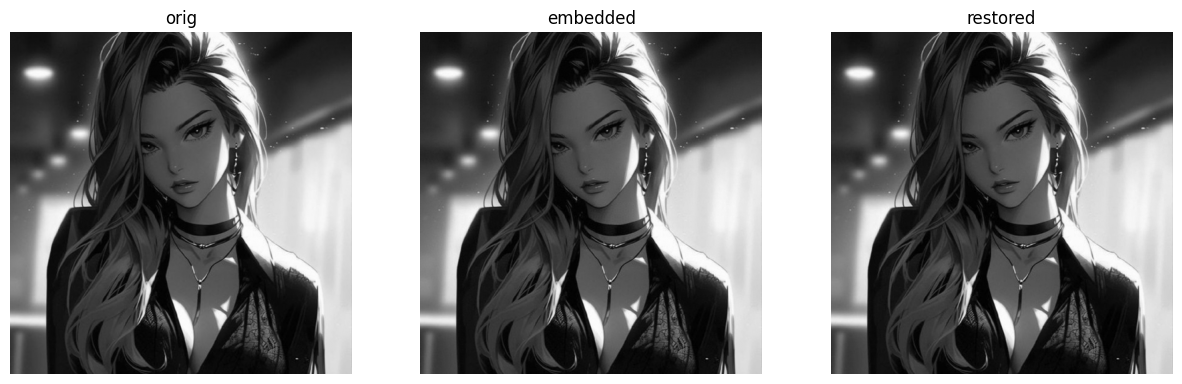

t               : 1.176546
block size      : 64
changed         : 62
PNSR            : 53.96
error function  : 0.37063269291396833

image size      : 512x512 = 262144
message len     : 64 bits
total image cap : 64 bits (blocks)
side info size  : 8928 bits (int8, float64)
bits overcap    : 139.50x

restored_img    : True
restored_mess   : True (64/64 = 100.00 %)
time embedding  : 0.012s
time extracting : 0.011s
time total      : 0.023s



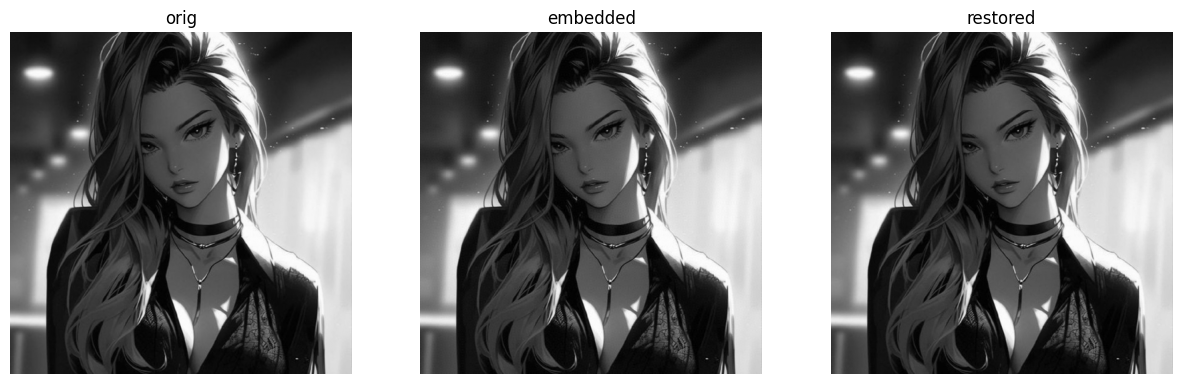

t               : 2.545006
block size      : 64
changed         : 64
PNSR            : 48.48
error function  : 0.4125678490048195

image size      : 512x512 = 262144
message len     : 64 bits
total image cap : 64 bits (blocks)
side info size  : 9216 bits (int8, float64)
bits overcap    : 144.00x

restored_img    : True
restored_mess   : True (64/64 = 100.00 %)
time embedding  : 0.012s
time extracting : 0.011s
time total      : 0.023s

trail(0)   error(0.412567849004820) pred(0.000000)       t(2.545006)  b_size(64)

random_sol - best_sol = 0.4125678490048195 - 0.37063269291396833 = 0.04193515609085119


In [1159]:
import utils as ut
import embedding as em
import ABC
import importlib
importlib.reload(ut)
importlib.reload(em)
importlib.reload(ABC)

block_size = 64
# orig = ut.gen_test(8)
orig = ut.load_image("imgs/girl2.jpg")
# ut.pmat(orig)
mess = ut.gen_mess((orig.shape[0] // block_size) ** 2)

space = ABC.AbcSpace()
space.block_size = (block_size, block_size)

process_params = em.ProcessParams()
process_params.debug = False
process_params.use_new_bit_extraction = True
process_params.use_new_error_function = False

params = ABC.AbcParams(process_params=process_params)
params.debug = False
params.show_images_at_end = True
params.show_food_sources = True

abc = ABC.Abc(orig, mess, space=space, params=params)

best_sol = abc.run()
random_stats = abc.run_random()
print(random_stats)

print(f'\nrandom_sol - best_sol = {random_stats.error} - {best_sol.error} = {random_stats.error - best_sol.error}')